In [ ]:
%cd "/content/drive/MyDrive/kaggle/boston_house_price"

/content/drive/MyDrive/kaggle/boston_house_price


In [ ]:
# data analytics
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
%matplotlib inline

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# model
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
df = pd.read_csv('1st_train_mdf.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 종속변수 MSZoning

In [ ]:
msz_cnt = pd.DataFrame({"index": df["MSZoning"].value_counts().index,
                        "count": df["MSZoning"].value_counts().values})

fig = px.pie(msz_cnt, values='count', names='index', hole = 0.4, title='MSZoning')
fig.show()

# 전체 데이터 분포

In [ ]:
df = df.drop('Id', axis = 1, inplace = False)

df_num = df.select_dtypes(exclude = "object").columns
df_cat = df.select_dtypes(include = "object").columns

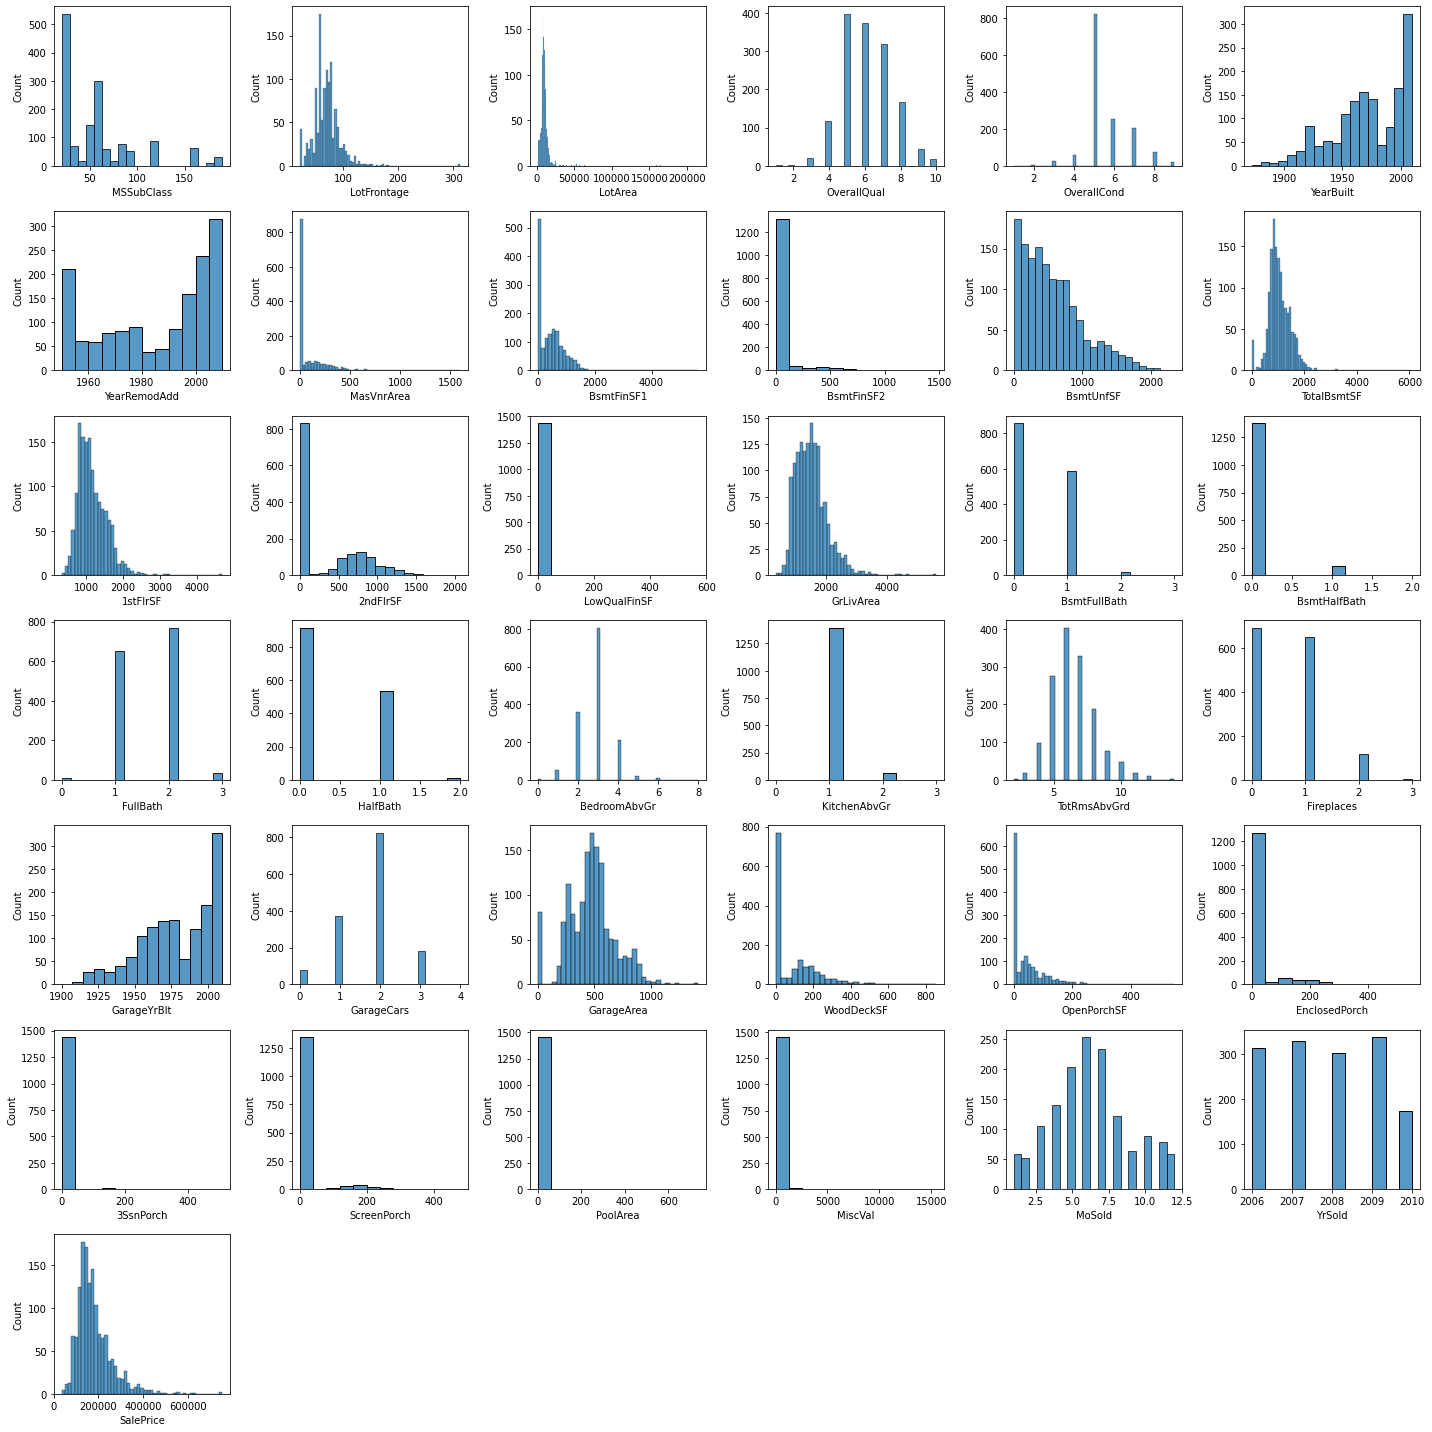

In [ ]:
# 수치형 변수 histplot
plt.figure(figsize=(20, 20))
for i in range(len(df_num)):
    plt.subplot(7, 6, i+1)
    sns.histplot(df[df_num[i]])
plt.tight_layout()

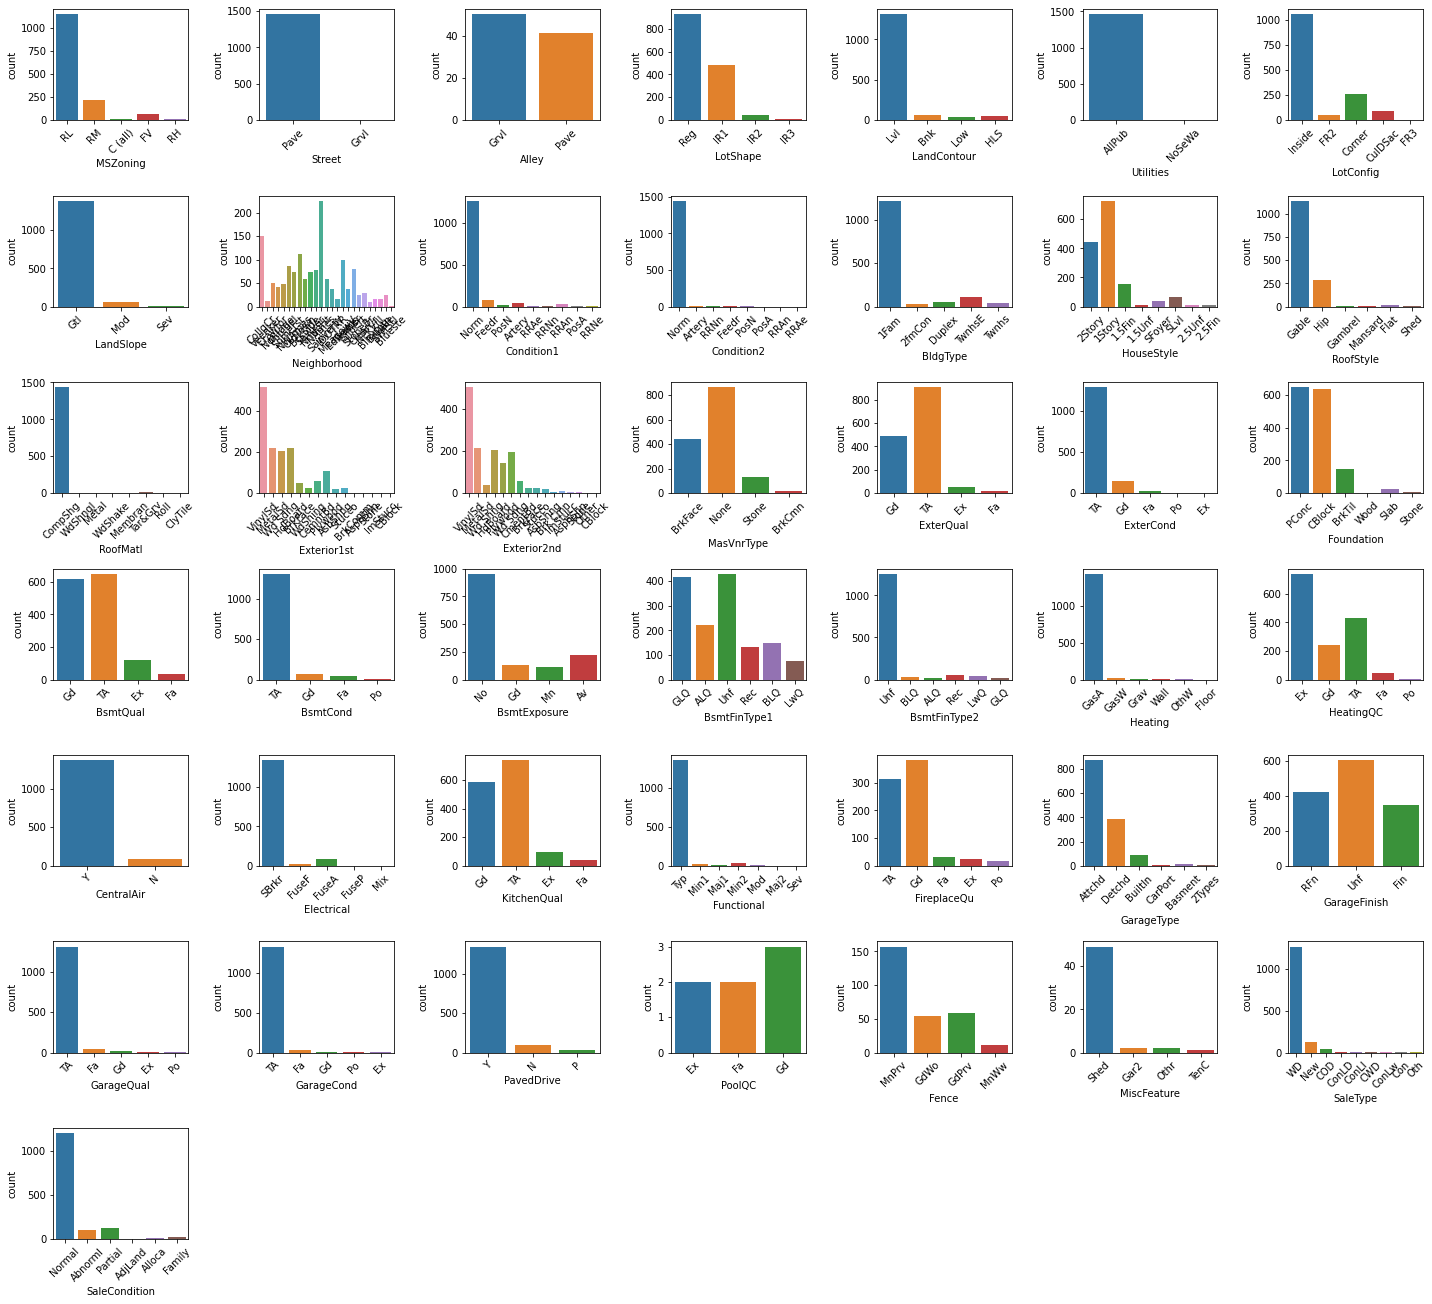

In [ ]:
# 명목형 변수 countplot
plt.figure(figsize=(20, 20))
for i in range(len(df_cat)):
    plt.subplot(8, 7, i+1)
    sns.countplot(df[df_cat[i]])
    plt.xticks(rotation = 45)
plt.tight_layout()

# 중복 변수 제거 및 변수 결합

Text(0.5, 1.0, 'Distrinution of BsmtSF')

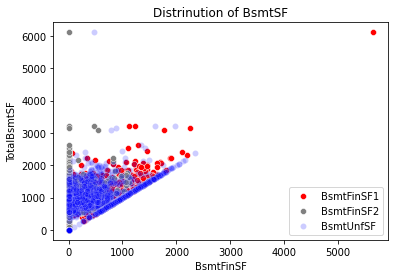

In [ ]:
sns.scatterplot('BsmtFinSF1', 'TotalBsmtSF', data = df, label = 'BsmtFinSF1', color = "red")
sns.scatterplot('BsmtFinSF2', 'TotalBsmtSF', data = df, label = 'BsmtFinSF2', color = "grey")
sns.scatterplot('BsmtUnfSF', 'TotalBsmtSF', data = df, label = 'BsmtUnfSF', color = "blue", alpha = 0.2)
plt.xlabel('BsmtFinSF')
plt.ylabel('TotalBsmtSF')
plt.title('Distrinution of BsmtSF')

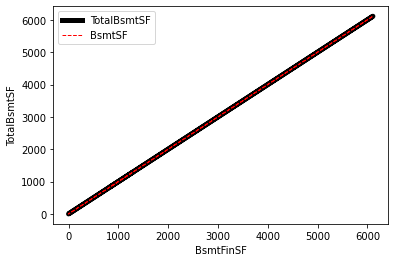

In [ ]:
plt.plot(df['TotalBsmtSF'], df['TotalBsmtSF'], lw = 5, c = 'k', label = 'TotalBsmtSF')
plt.plot(df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF'], df['TotalBsmtSF'], lw = 1, ls = '--', c = 'red',
        label = 'BsmtSF')
plt.ylabel('TotalBsmtSF')
plt.xlabel('BsmtFinSF')
# plt.title('지하실 마감 면적 관계 플롯')
plt.legend()

Text(0.5, 1.0, 'Distribution of LivArea')

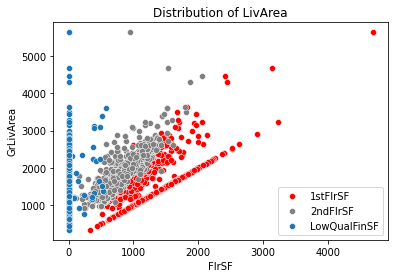

In [ ]:
sns.scatterplot('1stFlrSF', 'GrLivArea', data = df, label = '1stFlrSF', color = "red")
sns.scatterplot('2ndFlrSF', 'GrLivArea', data = df, label = '2ndFlrSF', color = "grey")
sns.scatterplot('LowQualFinSF', 'GrLivArea', data = df, label = 'LowQualFinSF')
plt.xlabel('FlrSF')
plt.ylabel('GrLivArea')
plt.title('Distribution of LivArea')

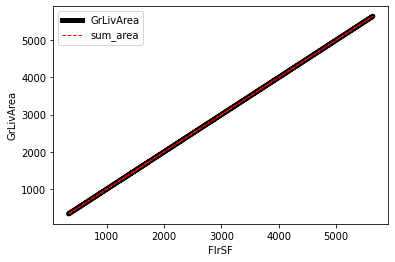

In [ ]:
plt.plot(df['GrLivArea'], df['GrLivArea'], lw = 5, c = 'k', label = 'GrLivArea')
plt.plot(df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'], df['GrLivArea'], lw = 1, ls = '--', c = 'red', label = 'sum_area')
plt.ylabel('GrLivArea')
plt.xlabel('FlrSF')
# plt.title('지상 면적 관계 플롯')
plt.legend()

In [ ]:
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']


In [ ]:
train_df = df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = False)

# 이산형 -> 명목형

In [ ]:
# 이산형 -> 명목형
num = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for col in num:
  train_df[col] = train_df[col].astype('str')

# 결측치 처리

In [ ]:
# 결측치 변수와 비율
null_var = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0].rename('count').to_frame()
null_var['ratio'] = np.round(null_var['count'] * 100 / len(df), 2)
null_var

,count,ratio
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
GarageCond,81,5.55


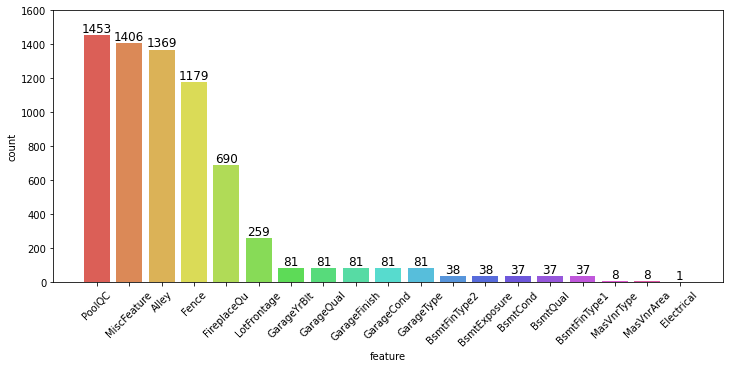

In [ ]:
# 결측치 변수와 개수 시각화
plt.figure(figsize = (12, 5))
bar = plt.bar(null_var.index, null_var['count'], color = sns.color_palette('hls',len(null_var.index)))
plt.ylim(0, 1600)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size = 12)

plt.xlabel('feature')
plt.ylabel('count')
plt.xticks(rotation = 45)
# plt.title('변수 별 결측치 개수 분포')
plt.show()

In [ ]:
# 결측치 변환
train_df['BsmtExposure'][948] = 'GLQ'
train_df['BsmtFinType2'][332] = 'Unf'

train_df['PoolQC'] = train_df['PoolQC'].fillna('No Pool')
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')
train_df['Alley'] = train_df['Alley'].fillna('No Alley')
train_df['Fence'] = train_df['Fence'].fillna('Fence')
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('No Fireplace')
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['GarageType'] = train_df['GarageType'].fillna('No Garage')
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna('No Garage') # YearBuilt와 같은 값으로 채워려했으나 Garage가 없음
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('No Garage')
train_df['GarageQual'] = train_df['GarageQual'].fillna('No Garage')
train_df['GarageCond'] = train_df['GarageCond'].fillna('No Garage')
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('No Basement')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('No Basement')
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('No Basement')
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('No Basement')
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('No Basement')
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [ ]:
# 이산형 -> 명목형
train_df['BsmtFullBath'] = train_df['BsmtFullBath'].astype('str')
train_df['BsmtHalfBath'] = train_df['BsmtHalfBath'].astype('str')
train_df['FullBath'] = train_df['FullBath'].astype('str')
train_df['HalfBath'] = train_df['HalfBath'].astype('str')
train_df['BedroomAbvGr'] = train_df['BedroomAbvGr'].astype('str')
train_df['KitchenAbvGr'] = train_df['KitchenAbvGr'].astype('str')
train_df['TotRmsAbvGrd'] = train_df['TotRmsAbvGrd'].astype('str')
train_df['Fireplaces'] = train_df['Fireplaces'].astype('str')
train_df['GarageCars'] = train_df['GarageCars'].astype('str')

# 이상치 처리

Text(0.5, 1.0, 'Boxplot of GrLivArea')

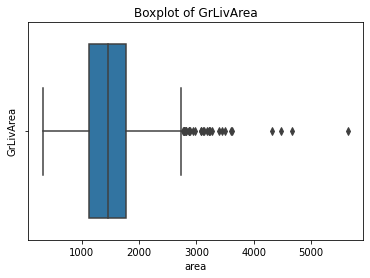

In [ ]:
sns.boxplot(train_df['GrLivArea'])
plt.xlabel("area")
plt.ylabel("GrLivArea")
plt.title("Boxplot of GrLivArea")

In [ ]:
# 이상치 처리
num_cols = train_df.select_dtypes(exclude = "object").columns
cat_cols = train_df.select_dtypes(include = 'object').columns

def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

df_out = remove_out(train_df, num_cols)

Text(0.5, 1.0, 'remove outlier')

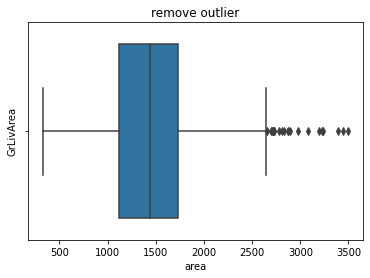

In [ ]:
sns.boxplot(df_out['GrLivArea'])
plt.xlabel("area")
plt.ylabel("GrLivArea")
plt.title("remove outlier")

# 독립변수, 종속변수

In [ ]:
# 독립변수, 종속변수
y = df_out['MSZoning'] # 종속변수
X = df_out.drop('MSZoning', axis = 1, inplace = False) # 독립변수

In [ ]:
# 연속형, 순서형, 명목형 변수
num_cols = X.select_dtypes(exclude = "object").columns
ord_cols = ['OverallCond', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold',
            'LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
           'PoolQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish', 'Fence']
cat_cols = ['MSSubClass', 'Street', 'Alley',  'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces',
        'GarageType',
       'GarageCars', 'PavedDrive', 
       'MiscFeature', 'SaleType',
       'SaleCondition']

# 인코딩 표준화

In [ ]:
for col in ord_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
X = pd.get_dummies(X)

In [ ]:
for col in ord_cols:
    minmax = MinMaxScaler()
    X[col] = minmax.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
for col in num_cols:
  X[col] = np.log1p(X[col])

In [ ]:
# 다항 -> 이항
y.replace('RM', 'NO_RL', inplace = True)
y.replace('C (all)', 'NO_RL', inplace = True)
y.replace('FV', 'NO_RL', inplace = True)
y.replace('RH', 'NO_RL', inplace = True)

In [ ]:
y.value_counts()

RL       1030
NO_RL     292
Name: MSZoning, dtype: int64

# 모델링

In [ ]:
rf_reg = RandomForestClassifier(random_state = 42, n_jobs = -1)


In [ ]:
# train, test 분리
def exec_skfold(clf, folds):
    skfold = StratifiedKFold(n_splits = folds)
    n_iter = 0
    scores = []

    for iter_count, (train_index, test_index) in enumerate(skfold.split(X, y)):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
    
        accuracy = np.round(accuracy_score(y_test, pred), 4)
        scores.append(accuracy)
        
        print('\n#{0} 교차 검증 정확도: {1:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('\n## 평균 검증 정확도: {0:.4f}'.format(mean_score))

In [ ]:
exec_skfold(rf_reg, folds = 5)



#0 교차 검증 정확도: 0.9245

#1 교차 검증 정확도: 0.9208

#2 교차 검증 정확도: 0.9508

#3 교차 검증 정확도: 0.9356

#4 교차 검증 정확도: 0.9242

## 평균 검증 정확도: 0.9312


In [ ]:
skfold = StratifiedKFold(n_splits = 5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in skfold.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_reg.fit(X_train, y_train)
    pred = rf_reg.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.9245, 학습 데이터 크기: 1057, 검증 데이터 크기: 265
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 22

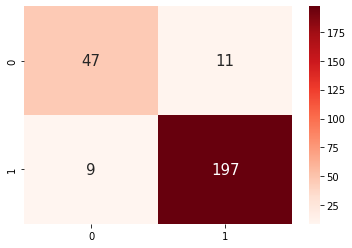

In [ ]:
# 혼동행렬
sns.heatmap(confusion_matrix(y_test, pred), fmt = 'd', annot = True, cmap = plt.cm.Reds,  annot_kws = {'size':15})


In [ ]:
# 평가지표
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       NO_RL       0.84      0.81      0.82        58
          RL       0.95      0.96      0.95       206

    accuracy                           0.92       264
   macro avg       0.89      0.88      0.89       264
weighted avg       0.92      0.92      0.92       264



In [ ]:
# 종속변수 테스트 데이터셋 클래스를 각각 0, 1로 변환
y_test.replace('NO_RL', 0, inplace = True)
y_test.replace('RL', 1, inplace = True)

In [ ]:
pred_positive_label = rf_reg.predict_proba(X_test)[:, 1]

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)
thr_index = np.arange(0, thresholds.shape[0], 10)

In [ ]:
print('thresholds : ', np.round(thresholds[thr_index],2))
print('precisions : ', np.round(precisions[thr_index],3))
print('recalls : ', np.round(recalls[thr_index],3))

thresholds :  [0.16 0.29 0.42 0.56 0.7  0.84 0.95]
precisions :  [0.814 0.879 0.922 0.956 0.989 0.988 1.   ]
recalls :  [1.    0.99  0.971 0.942 0.883 0.772 0.553]


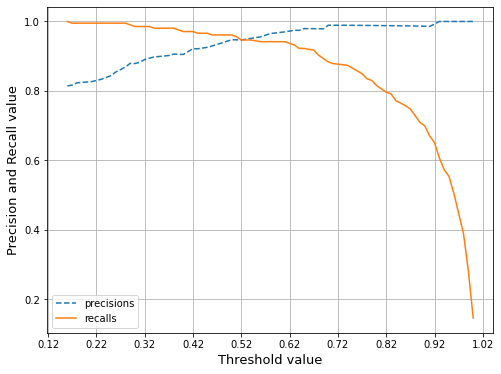

In [ ]:
# 임계값과 정밀도 재현율 값 시각화 함수
def precision_recall_curve_plot(y_test, pred_positive_label):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], '--', label='precisions')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    plt.xlabel('Threshold value', fontsize = 13)
    plt.ylabel('Precision and Recall value', fontsize = 13)
    plt.grid(True)
    plt.legend()
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # scale 0.1 단위

precision_recall_curve_plot(y_test, pred_positive_label)

(0.7303030303030302, 1.01)

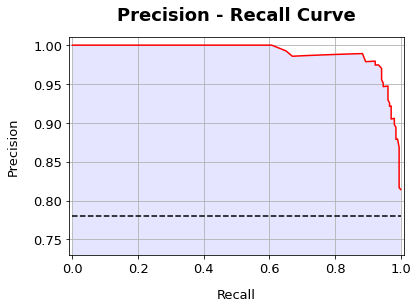

In [ ]:
# 정밀도 재현율 커브 시각화
plt.plot(recalls ,precisions, c = 'red')
base_rate = y_test.mean()
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.title('Precision - Recall Curve',fontsize=18,fontweight="bold",y=1.05)
plt.fill_between(recalls, precisions, facecolor = 'blue', alpha = 0.1)
plt.xlabel('Recall',fontsize=13,labelpad=13)
plt.ylabel('Precision',fontsize=13,labelpad=13,)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-0.01,1.01)
plt.grid(True)
plt.ylim(base_rate-0.05,1.01)

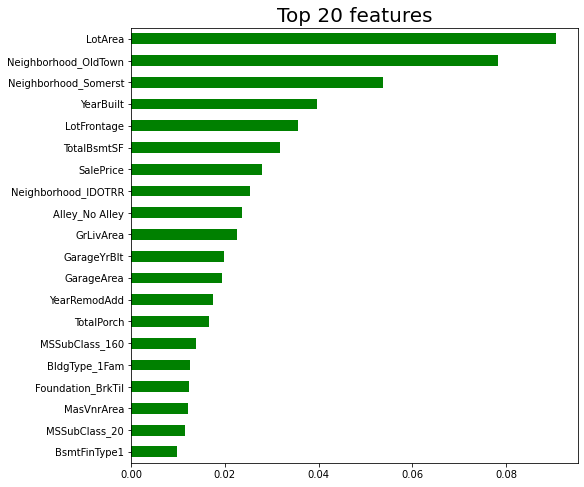

In [ ]:
# 변수 중요도 top20
plt.figure(figsize = (8, 8))
rf_feat_importances = pd.Series(rf_reg.feature_importances_, index = X.columns)
rf_feat_importances.sort_values(ascending = True).tail(20).plot.barh(color = 'green')
plt.title('Top 20 features', fontsize = 20)
plt.show()

In [ ]:
rf_feat_importances.nlargest(20)

LotArea                 0.090734
Neighborhood_OldTown    0.078196
Neighborhood_Somerst    0.053754
YearBuilt               0.039635
LotFrontage             0.035627
TotalBsmtSF             0.031756
SalePrice               0.027848
Neighborhood_IDOTRR     0.025284
Alley_No Alley          0.023640
GrLivArea               0.022593
GarageYrBlt             0.019885
GarageArea              0.019448
YearRemodAdd            0.017520
TotalPorch              0.016627
MSSubClass_160          0.013822
BldgType_1Fam           0.012560
Foundation_BrkTil       0.012282
MasVnrArea              0.012217
MSSubClass_20           0.011526
BsmtFinType1            0.009787
dtype: float64

# 변수 선택 후

In [ ]:
# 독립변수
features_20 = ['LotArea', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'YearBuilt',
       'LotFrontage', 'TotalBsmtSF', 'SalePrice', 'Neighborhood_IDOTRR',
       'Alley_No Alley', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'YearRemodAdd', 'TotalPorch', 'MSSubClass_160', 'BldgType_1Fam',
       'Foundation_BrkTil', 'MasVnrArea', 'MSSubClass_20', 'BsmtFinType1']

X3 = X[features_20]
X3.shape

(1322, 20)

In [ ]:
skfold = StratifiedKFold(n_splits = 5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in skfold.split(X3, y):
    X_train3, X_test3 = X3.values[train_index], X3.values[test_index]
    y_train3, y_test3 = y[train_index], y[test_index]
    
    rf_reg.fit(X_train3, y_train3)
    pred3 = rf_reg.predict(X_test3)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test3, pred3), 4)
    train_size = X_train3.shape[0]
    test_size = X_test3.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.9509, 학습 데이터 크기: 1057, 검증 데이터 크기: 265
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 22

              precision    recall  f1-score   support

       NO_RL       0.83      0.86      0.85        58
          RL       0.96      0.95      0.96       206

    accuracy                           0.93       264
   macro avg       0.90      0.91      0.90       264
weighted avg       0.93      0.93      0.93       264



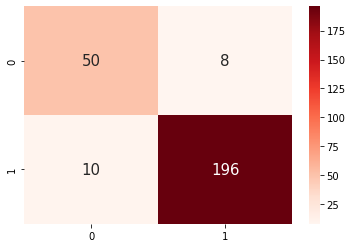

In [ ]:
sns.heatmap(confusion_matrix(y_test3, pred3), fmt = 'd', annot = True, cmap = plt.cm.Reds, annot_kws = {'size':15})
print(classification_report(y_test3, pred3))

In [ ]:
y_test3.replace('NO_RL', 0, inplace = True)
y_test3.replace('RL', 1, inplace = True)

In [ ]:
pred_positive_label3 = rf_reg.predict_proba(X_test3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test3, pred_positive_label3)
thr_index = np.arange(0, thresholds.shape[0], 10)

In [ ]:
print('thresholds : ', np.round(thresholds[thr_index],2))
print('precisions : ', np.round(precisions[thr_index],3))
print('recalls : ', np.round(recalls[thr_index],3))

thresholds :  [0.1  0.24 0.36 0.62 0.73 0.86 0.96]
precisions :  [0.814 0.887 0.943 0.965 0.984 0.988 0.992]
recalls :  [1.    0.99  0.966 0.937 0.879 0.796 0.636]


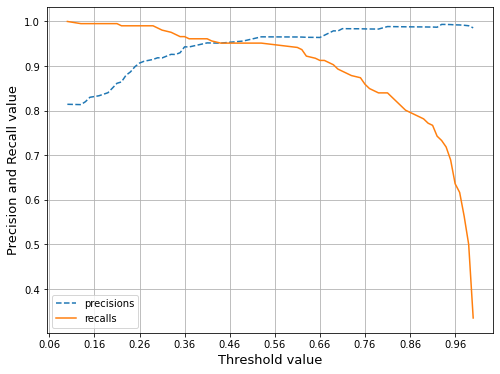

In [ ]:
# 임계값과 정밀도 재현율 값 시각화
precision_recall_curve_plot(y_test3, pred_positive_label3)

(0.7303030303030302, 1.01)

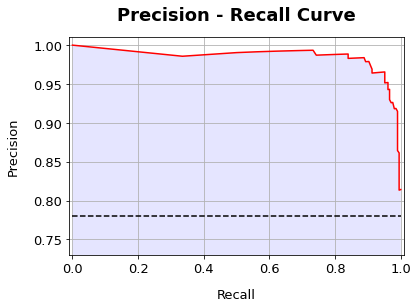

In [ ]:
# 정밀도 재현율 커브 시각화
plt.plot(recalls ,precisions, c = 'red')
base_rate = y_test3.mean()
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.title('Precision - Recall Curve',fontsize=18,fontweight="bold",y=1.05)
plt.fill_between(recalls, precisions, facecolor = 'blue', alpha = 0.1)
plt.xlabel('Recall',fontsize=13,labelpad=13)
plt.ylabel('Precision',fontsize=13,labelpad=13,)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-0.01,1.01)
plt.grid(True)
plt.ylim(base_rate-0.05,1.01)

In [ ]:
pred3 = np.where(pred3 == 'NO_RL', 0, pred3)
pred3 = np.where(pred3 == 'RL', 1, pred3)
print('precision recall auc value {}'.format(average_precision_score(y_test3, pred3)))


precision recall auc value 0.9520230863748853


In [ ]:
rf_reg.fit(X3, y)
feature_scores = pd.Series(rf_reg.feature_importances_, index=X3.columns).sort_values(ascending=False)
feature_scores[:10]

LotArea                 0.188401
Neighborhood_OldTown    0.110878
YearBuilt               0.081918
Neighborhood_Somerst    0.075601
TotalBsmtSF             0.063625
LotFrontage             0.062421
SalePrice               0.056878
Neighborhood_IDOTRR     0.053744
GrLivArea               0.046589
GarageArea              0.036142
dtype: float64

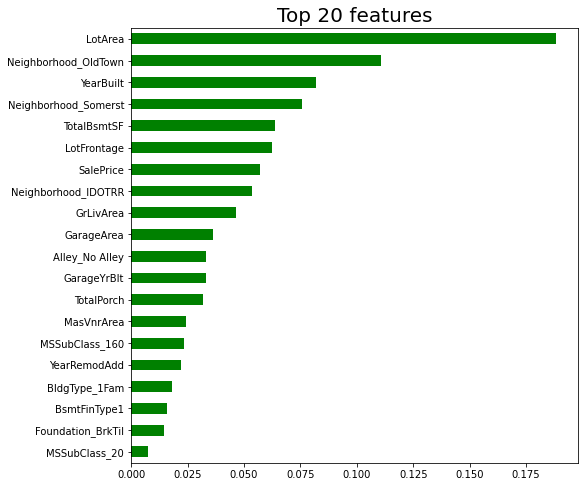

In [ ]:
plt.figure(figsize = (8, 8))
rf_feat_importances = pd.Series(rf_reg.feature_importances_, index = X3.columns)
rf_feat_importances.sort_values(ascending = True).tail(20).plot.barh(color = 'green')
plt.title('Top 20 features', fontsize = 20)
plt.show()